In [1]:
import pandas

In [2]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [3]:
stock_info

,Unnamed: 0,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...,...
8108,8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from seaborn import scatterplot

In [5]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [6]:
x

,Unnamed: 0,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...,...
8108,8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [7]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=432,test_size=0.15,shuffle=True)

In [9]:
len(x_test)

1217

In [10]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=145,test_size=0.2,shuffle=True)

In [11]:
print(len(x_train),len(x_test),len(x_val))

6896 973 244


In [12]:
x_train=x_train.apply(lambda col: col.fillna(col.mean()))
x_test=x_test.apply(lambda col: col.fillna(col.mean()))
x_val=x_val.apply(lambda col: col.fillna(col.mean()))
y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [13]:
x_train.isnull().astype(int).sum()/len(x_train)

Unnamed: 0           0.0
Return_On_Equity     0.0
Current_Ratio        0.0
Asster_Turnover      0.0
WACC                 0.0
Dividend_Yield       0.0
Earnings_Yield       0.0
Revenue_Change       0.0
Net_Income_Change    0.0
dtype: float64

In [14]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

For the sake of time, and to not have to spend hours running a 4-way sensitivity analysis, I am using the optimal parameters for n_estimators and max depth yielded by the random forest model. This may mean that the optimal parameters for the other two parameters may not yield a 100% optimal model, but it will be extremely close. The decision tree based gradient boosting model also does not seem to provide a better error when compared to the random forest, so a sensitivity analysis most likely wont yield a better model than has already been created.

In [15]:
booster=GradientBoostingRegressor(n_estimators=175,subsample=.75,min_samples_split=3,max_depth=47)

In [16]:
booster.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=47, min_samples_split=3, n_estimators=175,
                          subsample=0.75)

In [17]:
y_predict=booster.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


<Axes: xlabel='Price_Change'>

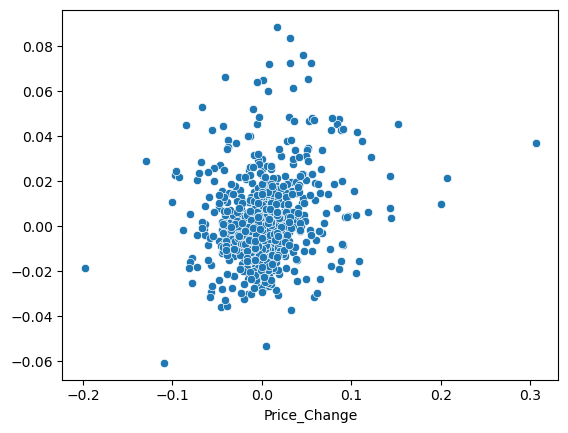

In [18]:
scatterplot(x=y_test,y=y_predict)

In [19]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.03534720282659652

Final Evaluation of model

In [21]:
booster=GradientBoostingRegressor(n_estimators=175,subsample=.75,min_samples_split=3,max_depth=47)
booster.fit(x_train,y_train)
y_evaluation=booster.predict(x_val.values)
error=(mean_squared_error(y_val,y_evaluation)**.5)*100

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [22]:
print(error)

3.7730100119340513


95% confidence interval for error

In [23]:
print((-1.96*error),(1.96*error))

-7.39509962339074 7.39509962339074


The second model in the set of Gradient Boosting models is the Histogram based Gradient Boosting regression tree. This model is best for large datasets and proves to be the most accurate so far. Unless a much better model is encountered, this will most likely be the model which will be focused on in the senior showcase.

In [24]:
hist_booster=HistGradientBoostingRegressor(max_iter=150,max_depth=47,learning_rate=.4)

In [25]:
hist_booster.fit(x_train,y_train)

HistGradientBoostingRegressor(learning_rate=0.4, max_depth=47, max_iter=150)

In [26]:
y_predict2=hist_booster.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


<Axes: xlabel='Price_Change'>

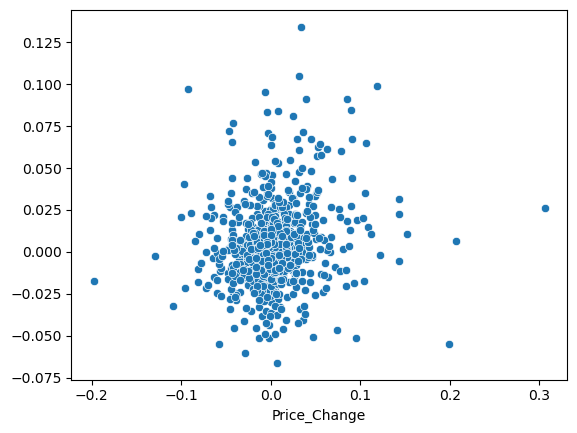

In [27]:
scatterplot(x=y_test,y=y_predict2)

In [28]:
error2=(mean_squared_error(y_test,y_predict2)**.5)
error2

0.037961641550347314

Sensitivity Analysis of Learning Rate

In [33]:
errors2=[]
for k in list(range(1,26)):
    hist_booster=HistGradientBoostingRegressor(max_iter=150,max_depth=47,learning_rate=(1/k))
    hist_booster.fit(x_train,y_train)
    y_predict2=hist_booster.predict(x_test.values)
    error2=(mean_squared_error(y_test,y_predict2)**.5)*100
    errors2.append(error2)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\

In [37]:
min_rate_error=(((errors2.index(min(errors2))+1)))
min_error=min(errors2)
print("A Learning rate of 1/"+str(min_rate_error)+" yields the lowest standard error of "+str(min_error)+"%.")

A Learning rate of 1/23 yields the lowest standard error of 3.42801111714285%.


Final Evaluation of Model

In [29]:
hist_booster=HistGradientBoostingRegressor(max_iter=150,max_depth=47,learning_rate=.4)
hist_booster.fit(x_train,y_train)
y_evaluation2=hist_booster.predict(x_val.values)
error2=(mean_squared_error(y_val,y_evaluation2)**.5)*100

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [38]:
print(error2)

3.444664163620831


95% Confidence interval for error

In [39]:
print((-1.96*error2),(1.96*error2))

-6.751541760696829 6.751541760696829
